### Final Project Submission

Please fill out:
* Student name: LAARIA CHRIS

* Student pace: full time
* Scheduled project review date/time: Friday, March 22-2024
* Instructor name: ASHA DEEN
* Blog post URL:


## Objective: Investigate the film industry to gain sufficient understanding of what attributes to success and in turn utilize this analysis to create actionable recommendations for Microsoft Company industry entry.

### Let's import libraries we may need for our analysis and import the dataframes.

In [3]:
# Your code here - remember to use markdown cells for comments as well!
import csv
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import numpy as np 
from datetime import datetime

Connect to the database

In [4]:
conn = sqlite3.connect('zippedData/im.db')
#cur=conn.cursor()

Converting CSV to datframe

In [5]:
df_movie_gross=pd.read_csv("zippedData/bom.movie_gross.csv")
df_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv", sep='\t')
df_reviews = pd.read_csv("zippedData/rt.reviews.tsv", sep='\t', encoding='latin1')
df_movie_budgets =pd.read_csv("zippedData/tn.movie_budgets.csv")
df_tmdb_movies=pd.read_csv("zippedData/tmdb.movies.csv")

let's preview the head of each dataframe so we know what data we are working with.

In [6]:
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [7]:
df_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
df_movie_info.head() 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [9]:
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# Question 1: What are the most profitable movies and how much sho?uld you spend?

Let's calculate profit and profit margin for each of the movies in `idf_movie_budgets` dataframe and add those as new columns.  

Here, we'll define profit as `Worldwide Gross`-`Production Budget`.



Movie_budgets-Checking For Nan values

In [11]:
df_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Movie_budgets-Checking For Duplicates

In [12]:
df_movie_budgets.describe()
df_movie_budgets.duplicated().value_counts()

False    5782
dtype: int64

Removing Dollar sign

In [13]:
df_movie_budgets['production_budget'] = pd.to_numeric(df_movie_budgets['production_budget'].astype(str).str.replace('$','').str.replace(',',''))
df_movie_budgets['domestic_gross'] = pd.to_numeric(df_movie_budgets['domestic_gross'].astype(str).str.replace('$','').str.replace(',',''))
df_movie_budgets['worldwide_gross'] = pd.to_numeric(df_movie_budgets['worldwide_gross'].astype(str).str.replace('$','').str.replace(',',''))
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [14]:
# Calculate profit
df_movie_budgets['profit'] = df_movie_budgets['worldwide_gross'] - df_movie_budgets['production_budget']
# Calculate profit margin
df_movie_budgets['profit_margin'] = (df_movie_budgets['profit'] / df_movie_budgets['worldwide_gross']) * 100

# Calculate ROI (Return on Investment)
df_movie_budgets['ROI'] = (df_movie_budgets['profit'] / df_movie_budgets['production_budget']) * 100

# Display the DataFrame with the new 'ROI' column
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,84.692106,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,60.733080,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-133.703598,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,76.436443,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,75.925058,315.369636


### Data Analysis & Results

plot a scatter plot of production budget and profit

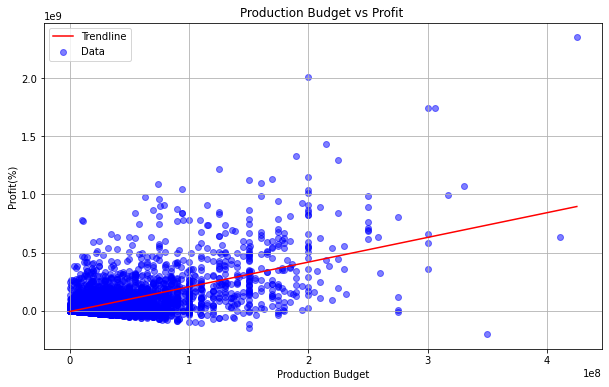

In [15]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_movie_budgets['production_budget'], df_movie_budgets['profit'], color='blue', alpha=0.5, label='Data')

# Fit a linear regression line
coefficients = np.polyfit(df_movie_budgets['production_budget'], df_movie_budgets['profit'], 1)
trendline_x = np.array([min(df_movie_budgets['production_budget']), max(df_movie_budgets['production_budget'])])
trendline_y = np.polyval(coefficients, trendline_x)
plt.plot(trendline_x, trendline_y, color='red', label='Trendline')

# Title and labels
plt.title('Production Budget vs Profit ')
plt.xlabel('Production Budget')
plt.ylabel('Profit(%)')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.show()

This scatter plot is helpful in beginning to understand how much money should be budgeted for a movie. The positive trend line indicates that an increase in the budget will result in an increase in profit.

In [16]:
profitable_movies_df = df_movie_budgets.loc[df_movie_budgets['profit'] > 0]
profitable_ranked_df = profitable_movies_df.sort_values(by=['profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True)
profitable_ranked_df.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,ROI
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,84.692106,553.257713
1,42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,90.942884,1004.104198
2,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,85.352522,582.711400
3,5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,85.097242,571.016739
4,33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,86.960647,666.909239


Plot a Bar chart of profits and budgets for the 25 most profitable Movies 

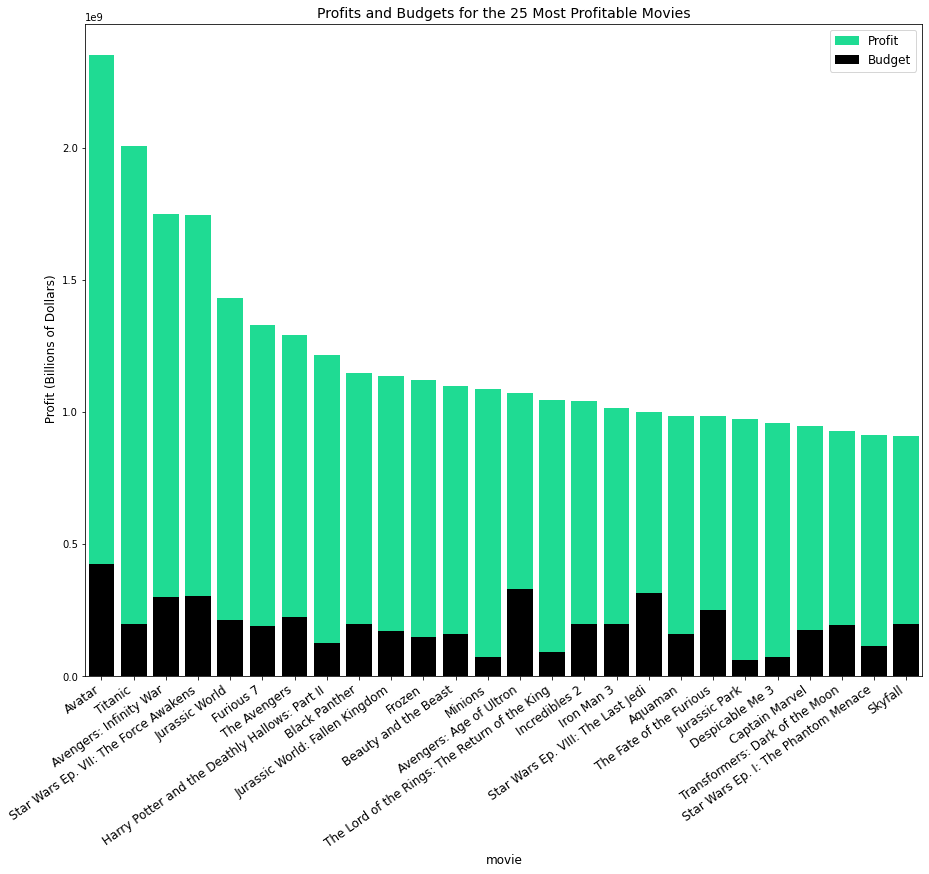

In [17]:
plt.figure(figsize=(15,12))
sns.barplot(x=profitable_ranked_df.loc[0:25, 'movie'],y=profitable_ranked_df.loc[0:25, 'profit'], 
            color='mediumspringgreen', label='Profit', ci=None)
sns.barplot(x=profitable_ranked_df.loc[0:25, 'movie'],y=profitable_ranked_df.loc[0:25, 'production_budget'], 
            color='black', label='Budget', ci=None)
plt.xlabel('movie', fontsize=12)
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontsize=14)
plt.ylabel(' Profit (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('ProfitBudgetTop25');

Clearly the most successful 25 movies have both incredible profits and profit margins. Titanic (1997), Avatar, and Avengers: Endgame are the most successful movies in terms of sheer profit.

In [18]:
df_movie_budgets['profit'].describe()

count    5.782000e+03
mean     5.989970e+07
std      1.460889e+08
min     -2.002376e+08
25%     -2.189071e+06
50%      8.550286e+06
75%      6.096850e+07
max      2.351345e+09
Name: profit, dtype: float64

In [19]:
df_movie_budgets.loc[0:24, 'production_budget'].describe()

count    2.500000e+01
mean     2.867680e+08
std      5.005396e+07
min      2.300000e+08
25%      2.500000e+08
50%      2.750000e+08
75%      3.000000e+08
max      4.250000e+08
Name: production_budget, dtype: float64

In [20]:
df_movie_budgets.loc[0:24, 'profit_margin'].describe()

count     25.000000
mean      55.443642
std       45.938852
min     -133.703598
25%       55.667504
50%       71.181566
75%       75.925058
max       85.352522
Name: profit_margin, dtype: float64

In [21]:
len(profitable_ranked_df.loc[profitable_ranked_df['profit_margin'] > 0.5])

3646

## Question 2: What is the best time of the year to release a movie?

Identify the month each movie was released

In [22]:
# Assuming 'release_date' is in datetime format, if not, convert it to datetime
profitable_ranked_df['release_date'] = pd.to_datetime(profitable_ranked_df['release_date'])
# Extract month from release_date
profitable_ranked_df['release_month'] = profitable_ranked_df['release_date'].dt.month
# Group by movie and release month and count the number of movies released in each month
movies_per_month = profitable_ranked_df.groupby(['movie', 'release_month']).size().reset_index(name='release_month_total')

# Group by release month and count the total number of movies released in each month
total_movies_per_month = profitable_ranked_df.groupby('release_month').size().reset_index(name='Total_movie')

# Merge the movie count DataFrames back to the original DataFrame
profitable_ranked_df = pd.merge(profitable_ranked_df, movies_per_month, on=['movie', 'release_month'], how='left')
profitable_ranked_df = pd.merge(profitable_ranked_df, total_movies_per_month, on='release_month', how='left')

# Display the updated DataFrame
print(profitable_ranked_df)

      index  id release_date                                 movie  \
0         0   1   2009-12-18                                Avatar   
1        42  43   1997-12-19                               Titanic   
2         6   7   2018-04-27                Avengers: Infinity War   
3         5   6   2015-12-18  Star Wars Ep. VII: The Force Awakens   
4        33  34   2015-06-12                        Jurassic World   
...     ...  ..          ...                                   ...   
3652   5623  24   2008-10-10                         Call+Response   
3653   5687  88   2004-02-06          The Lost Skeleton of Cadavra   
3654   4959  60   2015-04-07                            Lost River   
3655   4929  30   1993-01-29                               Nemesis   
3656   5495  96   1997-08-22                                Sunday   

      production_budget  domestic_gross  worldwide_gross      profit  \
0             425000000       760507625       2776345279  2351345279   
1             2

In [23]:
# Drop all columns except 'profit_margin', 'profit', 'movie', and 'release_month_name'
desired_columns = ['profit', 'release_month']
profitable_ranked_df = profitable_ranked_df[desired_columns]
profitable_ranked_df

,profit,release_month
0,2351345279,12
1,2008208395,12
2,1748134200,4
3,1747311220,12
4,1433854864,6
...,...,...
3652,12989,10
3653,10536,2
3654,9644,4
3655,1124,1


In [24]:
# Group by 'release_month' and calculate the total profit for each month
total_profits_df = profitable_ranked_df.groupby('release_month')['profit'].sum().reset_index()

# Rename the columns for clarity
total_profits_df.columns = ['release_month', 'Total_profits']
# Dictionary to map month numbers to their names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Map month numbers to names in the DataFrame
total_profits_df['release_month'] = total_profits_df['release_month'].map(month_names)

# Display the resulting DataFrame with month names
print(total_profits_df)

   release_month  Total_profits
0        January    10496416285
1       February    18734621966
2          March    24883332356
3          April    18091836931
4            May    47950845020
5           June    49181570765
6           July    44293617899
7         August    19590353119
8      September    14366041823
9        October    18778800039
10      November    47006555095
11      December    54139353060


### Data analysis & Results

Bar chart to show the best months to produce the movies

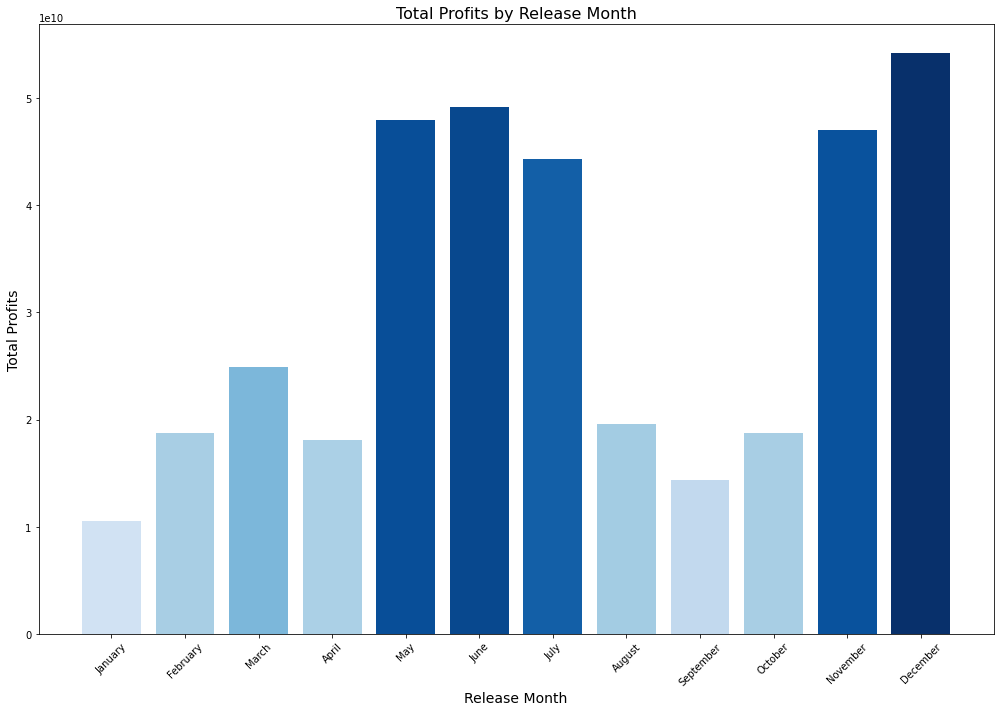

In [25]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Define colors for bars
colors = plt.cm.Blues(total_profits_df['Total_profits'] / float(max(total_profits_df['Total_profits'])))

# Create bar chart
bars = plt.bar(total_profits_df['release_month'], total_profits_df['Total_profits'], color=colors)

# Add labels and title
plt.xlabel('Release Month', fontsize=14)
plt.ylabel('Total Profits', fontsize=14)
plt.title('Total Profits by Release Month', fontsize=16)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interestingly, May, June and July shoot to the top in terms of the profit obtained.This is the same for also November and December It appears that the summer months tend to result in greater success, perhaps as a result of an influx of children and their parents during summer break.
let's dig a little further and see which genre tends to do the best in which month.This used the df_movie_info dataframe

## Question 3: How does the rating of the various genres of movies fair in IMDB data?

In this step we will be working with the IMDB sql database.We first begin by viewing the two tables movie_basics and movie_ratings into a pandas dataframe

In [26]:
movie_basics_db=pd.read_sql("""
SELECT * 
FROM movie_basics;
""", conn)
movie_basics_db

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [27]:
Movie_ratings_db=pd.read_sql("""
SELECT * 
FROM movie_ratings;
""", conn)
Movie_ratings_db

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


This code below joined the above two tables using the movie_id primary key

In [28]:
# Perform inner join using pandas merge
merged_data_db = pd.merge(movie_basics_db, Movie_ratings_db, on="movie_id", how="inner")
merged_data_db

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


Then the genres and average ratings were selected to work with.

In [29]:
Genres_Rating_db = merged_data_db[['genres', 'averagerating',]]
Genres_Rating_db

,genres,averagerating
0,"Action,Crime,Drama",7.0
1,"Biography,Drama",7.2
2,Drama,6.9
3,"Comedy,Drama",6.1
4,"Comedy,Drama,Fantasy",6.5
...,...,...
73851,Documentary,6.2
73852,"Drama,Family",8.7
73853,Documentary,8.5
73854,None,6.6


Data cleaning-Checking for any Nan values in the above dataframe

In [30]:
Genres_Rating_db.isna().sum()

genres           804
averagerating      0
dtype: int64

### Data Analysis & Results
Creating a Line plot of the average rating vs the genre

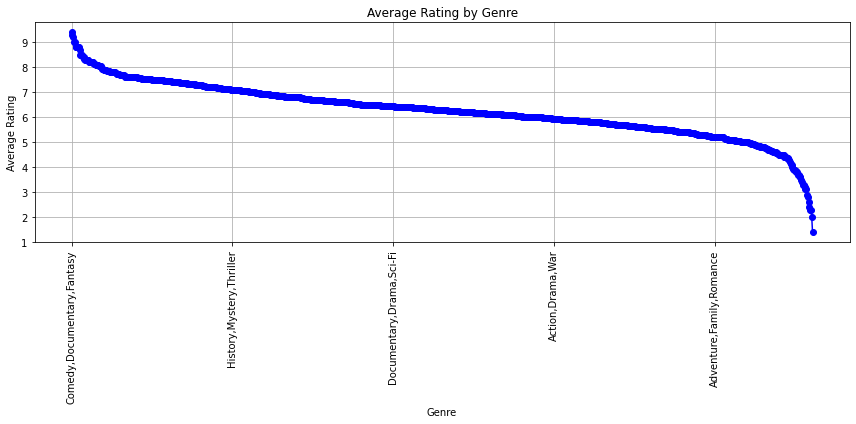

In [31]:
# Aggregate the data to calculate the average rating for each genre
average_rating_by_genre = Genres_Rating_db.groupby('genres')['averagerating'].mean()

# Sort the data by average rating in descending order
average_rating_by_genre = average_rating_by_genre.sort_values(ascending=False)

# Create the line plot
plt.figure(figsize=(12, 6))
average_rating_by_genre.plot(kind='line', marker='o', color='blue')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

From the above line plot it can be seen that the genre with the highest ratings are comedy, Documentary and FantasyMicrosoft Movie Studio should consider producing more content in genres like "Comedy/Documentary" and "Fantasy" as they have shown to be popular among audiences and have higher average ratings. By focusing on these genres, Microsoft can increase the chances of creating successful and well-received content.

**Question 3 Conclusion**: We recommend that Microsoft release the bulk of their movies in comedy, Documentary and Fantasy.This should be mainly be produced in the summer months

## Question 4: Which movie directors and writers add value to the movie ratings?

In this section we will try to determine how directors and writers create an impact on the value of the movie. This will be seen by trying to relate the directors and writers to the movie ratings.

In [32]:
Directors_db=pd.read_sql("""
SELECT * 
FROM Directors;
""", conn)
Directors_db

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [33]:
persons_db=pd.read_sql("""
SELECT * 
FROM persons;
""", conn)
persons_db

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [34]:
# Perform inner join using pandas merge
Directors_ratings = pd.merge(Directors_db, Movie_ratings_db, on="movie_id", how="inner")
Directors_persons_db = pd.merge(Directors_ratings, persons_db, on="person_id", how="inner")
Directors_DF= Directors_persons_db[['averagerating', 'primary_name','numvotes']]
# Sort the DataFrame by 'numvotes' column in descending order
sorted_df = Directors_DF.sort_values(by='numvotes', ascending=False)
# Keep only the first occurrence of each unique value in the 'primary_name' column
unique_Director_names_df = sorted_df.drop_duplicates(subset='primary_name', keep='first')
# Select the top 25 rows
top_ten_directors =unique_Director_names_df.head(10)
top_ten_directors

,averagerating,primary_name,numvotes
34695,8.8,Christopher Nolan,1841066
14135,8.4,Quentin Tarantino,1211405
52332,8.1,Joss Whedon,1183655
67568,8.2,Martin Scorsese,1035358
22482,8.1,James Gunn,948394
175612,8.0,Tim Miller,820847
81564,7.2,Gary Ross,795227
17829,8.0,J.J. Abrams,784780
152691,8.1,George Miller,780910
96156,8.1,David Fincher,761592


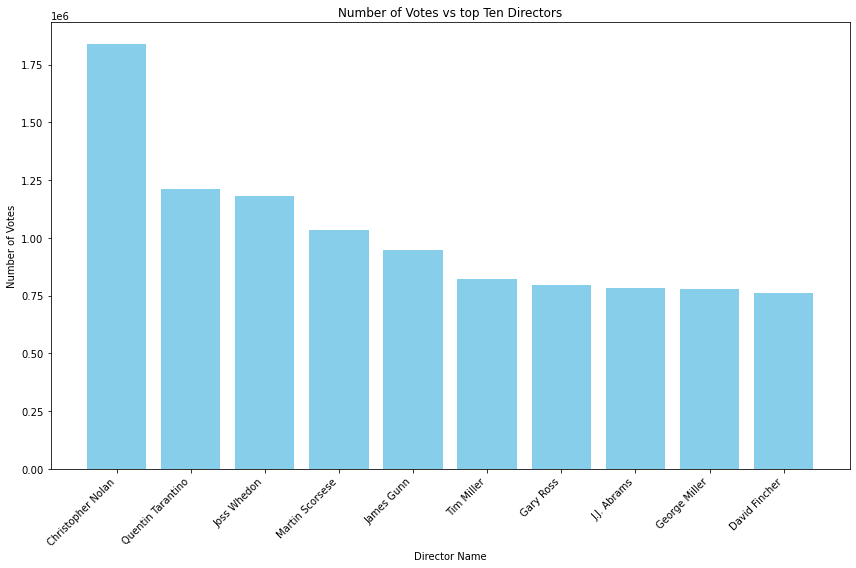

In [35]:
# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_ten_directors['primary_name'], top_ten_directors['numvotes'], color='skyblue')
plt.title('Number of Votes vs top Ten Directors')
plt.xlabel('Director Name')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 The directors listed, such as Christopher Nolan, Quentin Tarantino, and Martin Scorsese, have garnered significant attention and praise from audiences, as indicated by the high number of votes received for their works. This suggests that these directors have a strong reputation and a dedicated fan base. Collaborating with renowned directors like these can enhance the credibility and appeal of the movies produced by Microsoft Movie Studio.I also did the same for the top writers below

In [36]:
writers_db=pd.read_sql("""
SELECT * 
FROM writers;
""", conn)
writers_db

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [37]:
# Perform inner join using pandas merge
writers_ratings = pd.merge(writers_db, Movie_ratings_db, on="movie_id", how="inner")
writers_persons_db = pd.merge(writers_ratings, persons_db, on="person_id", how="inner")
writers_DF= writers_persons_db[['averagerating', 'primary_name','numvotes']]
# Sort the DataFrame by 'numvotes' column in descending order
sorted_writers_df = writers_DF.sort_values(by='numvotes', ascending=False)
# Keep only the first occurrence of each unique value in the 'primary_name' column
unique_writers_names_df =sorted_writers_df.drop_duplicates(subset='primary_name', keep='first')
# Select the top 25 rows
top_ten_writers =unique_writers_names_df.head(10)
top_ten_writers

,averagerating,primary_name,numvotes
30689,8.8,Christopher Nolan,1841066
17619,8.4,Bob Kane,1387769
30686,8.4,Jonathan Nolan,1387769
25680,8.4,David S. Goyer,1387769
12573,8.4,Quentin Tarantino,1211405
22069,8.1,Joss Whedon,1183655
26353,8.1,Zak Penn,1183655
59958,8.2,Terence Winter,1035358
59959,8.2,Jordan Belfort,1035358
23174,8.1,Dennis Lehane,1005960


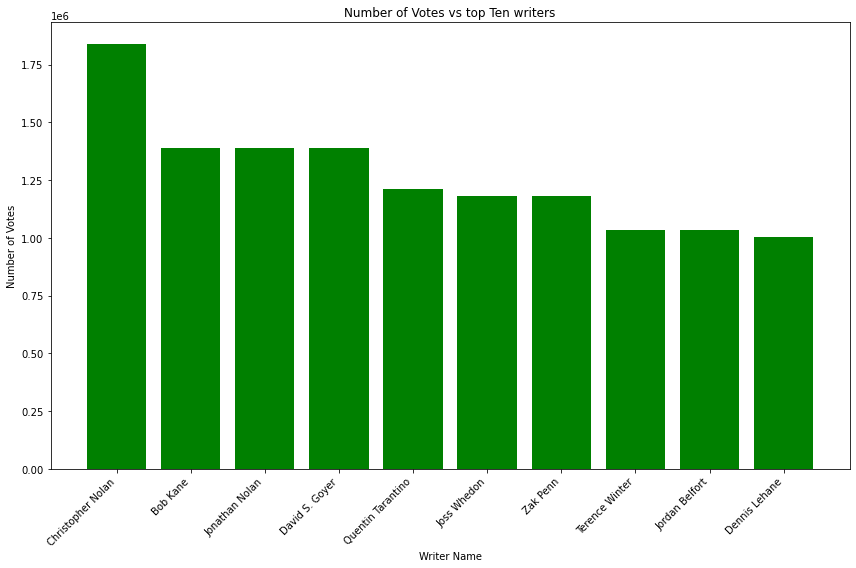

In [38]:
# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_ten_writers['primary_name'], top_ten_writers['numvotes'], color='green')
plt.title('Number of Votes vs top Ten writers')
plt.xlabel('Writer Name')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above are the top ten writers that microsoft should engage with.Partnering with top writers offers an opportunity for Microsoft Movie Studio to produce high-quality content that resonates with audiences. These directors & writers have demonstrated their ability to craft compelling narratives, innovate in storytelling techniques, and deliver memorable cinematic experiences. By collaborating with them, Microsoft Movie Studio can create content that stands out in the competitive entertainment industry.